In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# suptitle function learned here: https://stackoverflow.com/questions/1388450/giving-graphs-a-subtitle-in-matplotlib

In [15]:
data = pd.read_csv('../Resources/total_combined_data_no_game_location.csv')
data = data[data["year"]>=2010]
cols = list(data.columns.values)

data = data[["name","position","year","height_inches","weight","player_age","draft_round",'total_passing_fantasy_points', 'total_rushing_fantasy_points', 'total_receiving_fantasy_points', 'total_other_fantasy_points', 'total_combined_fantasy_points']]
data["draft_round"] = data["draft_round"].fillna(8.0)
data.head()

,name,position,year,height_inches,weight,player_age,draft_round,total_passing_fantasy_points,total_rushing_fantasy_points,total_receiving_fantasy_points,total_other_fantasy_points,total_combined_fantasy_points
32,Chandler Worthy,WR,2015,69.0,173.0,8048.833333,8.0,0.0,0.0,4.4,0,4.4
39,MyCole Pruitt,TE,2015,74.0,251.0,8634.985294,5.0,0.0,0.0,23.1,0,23.1
40,MyCole Pruitt,TE,2016,74.0,251.0,9003.500000,5.0,0.0,0.0,3.3,0,3.3
54,Emmanuel Sanders,WR,2010,71.0,186.0,8661.062500,3.0,0.0,0.0,93.7,0,93.7
55,Emmanuel Sanders,WR,2011,71.0,186.0,8994.000000,3.0,0.6,0.0,76.9,0,77.5


In [20]:
qb_mm = data[data["position"]=="QB"]
qb_mm = qb_mm[qb_mm["total_combined_fantasy_points"]>64]
qbmin = qb_mm["total_combined_fantasy_points"].min()
qbmax = qb_mm["total_combined_fantasy_points"].max()
print(f"4ppg Lowest Score is {qbmin}")
print(f"4ppg Highest Score is {qbmax}")

4ppg Lowest Score is 64.7
4ppg Highest Score is 573.1800000000002


Training Score: 0.10746986997013132
Testing Score: 0.07709573555661986


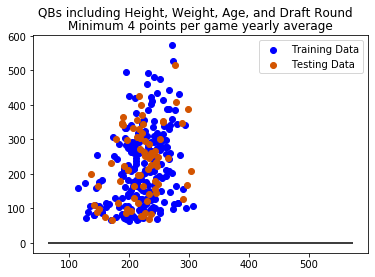

In [37]:
#4ppg
#quarterbacks all variables
qbs = qb_mm[qb_mm["position"]=="QB"]
X = qbs[["height_inches","weight","player_age","draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
#print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test),  y_test, c="#D35400", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.suptitle("QBs including Height, Weight, Age, and Draft Round")
plt.title("Minimum 4 points per game yearly average")

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0033905498283741675
Testing Score: 0.0054941173142774025


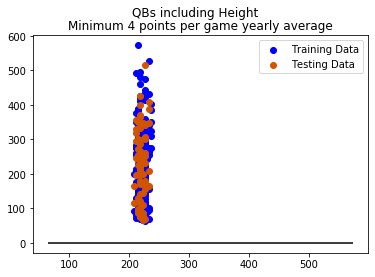

In [47]:
#quarterbacks all height
qbs = qb_mm[qb_mm["position"]=="QB"]
X = qbs[["height_inches"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
#print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test),  y_test, c="#D35400", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.suptitle("QBs including Height")
plt.title("Minimum 4 points per game yearly average")

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0021525865797588084
Testing Score: -0.014208886763320328


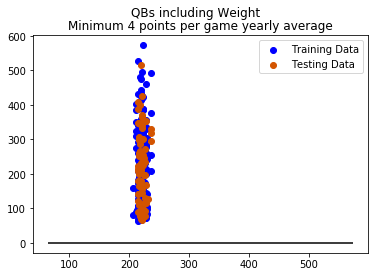

In [43]:
#quarterbacks all weight
qbs = qb_mm[qb_mm["position"]=="QB"]
X = qbs[["weight"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
#print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test),  y_test, c="#D35400", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.suptitle("QBs including Weight")
plt.title("Minimum 4 points per game yearly average")

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.01882947682169811
Testing Score: 0.04913507104099124


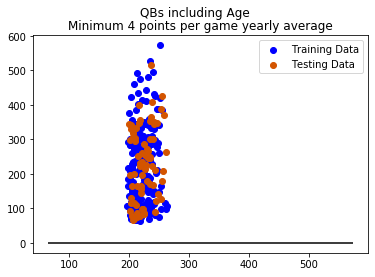

In [49]:
#quarterbacks age
qbs = qb_mm[qb_mm["position"]=="QB"]
X = qbs[["player_age"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
#print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test),  y_test, c="#D35400", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.suptitle("QBs including Age")
plt.title("Minimum 4 points per game yearly average")

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.05529945292167704
Testing Score: -0.03402635666212084


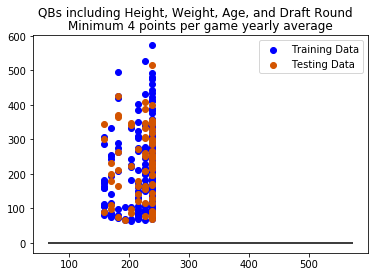

In [53]:
#quarterbacks all draft rounds
qbs = qb_mm[qb_mm["position"]=="QB"]
X = qbs[["draft_round"]]
y = qbs["total_combined_fantasy_points"].values.reshape(-1, 1)
#print(X.shape, y.shape)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=24)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
plt.scatter(model.predict(X_train), y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test),  y_test, c="#D35400", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.suptitle("QBs including Height, Weight, Age, and Draft Round")
plt.title("Minimum 4 points per game yearly average")

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

In [15]:
rb_mm = data[data["position"]=="RB"]
rbmin = rb_mm["total_combined_fantasy_points"].min()
rbmax = rb_mm["total_combined_fantasy_points"].max()
print(f"Lowest Score is {rbmin}")
print(f"Highest Score is {rbmax}")
#what if we take out values where QB averaged fewer than 4 fantasy points per game?
#4 points per game * 8 home/away games =32
rb_mm_nz = rb_mm[rb_mm["total_combined_fantasy_points"]>32]

Lowest Score is -0.4
Highest Score is 212.5
